In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_csv('/Users/xieqingyao/Desktop/regression1.csv')
X = data.iloc[:,0].values
y = data.iloc[:,-1].values

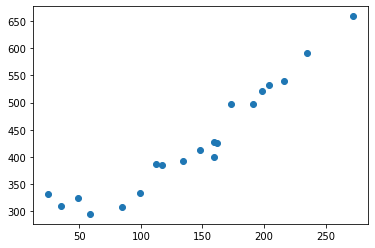

In [ ]:
plt.scatter(X,y)

In [ ]:
# data #20個x,y值
# X
# y

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X1 = X.reshape(-1,1)
X_std = sc_x.fit_transform(X1)

In [ ]:
# X1

In [ ]:
# X_std

In [ ]:
data.corr()

,X,y
X,1.000000,0.950392
y,0.950392,1.000000


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_std,y)
y_pred = lr.predict(X_std)
print('Slope: %.3f' % lr.coef_[0])
print('Intercept: %.3f' % lr.intercept_)

Slope: 95.564
Intercept: 428.600


In [ ]:
# y_pred = X_std*95.564 + 428.6

    MSE = 實際值跟回歸預測值誤差
    R^2 = 代表有多少Ｙ的變化能由Ｘ來解釋

In [ ]:
import sklearn.metrics as sm
print('MSE: %.3f' % sm.mean_squared_error(y,y_pred))
print('R^2: %.3f' % sm.r2_score(y,y_pred))

MSE: 978.262
R^2: 0.903


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X_std)

In [ ]:
pr.fit(X_quad,y)
y_quad_pred = pr.predict(X_quad)
print('theta1: %.3f' % pr.coef_[1])
print('theta2: %.3f' % pr.coef_[2])
print('Intercept: %.3f' % pr.intercept_)

theta1: 97.133
theta2: 22.623
Intercept: 405.977


In [ ]:
# y_quad_pred

In [ ]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [ ]:
# data

In [ ]:
import pandas as pd
feature = pd.DataFrame(data['data'],columns = data['feature_names'])
target = pd.DataFrame(data['target'],columns=['target'])
df = pd.concat([feature,target],axis=1) #合併

In [ ]:
# feature
# target
# df

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
cols = ['age','bmi','s1','s5','target']
sns.pairplot(df[cols])
plt.tight_layout()
plt.savefig('scatterplot.png',dpi=300)
plt.show()

<Figure size 1250x1250 with 30 Axes>

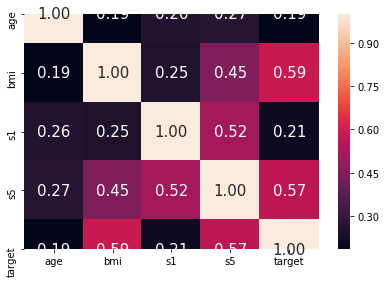

In [ ]:
import numpy as np 
cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols,xticklabels=cols)
plt.tight_layout()
plt.savefig('correlation.png',dpi=300)
plt.show()

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X,y = load_diabetes().data,load_diabetes().target
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=8)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

slr = LinearRegression()

slr.fit(X_train,y_train)
print(slr.coef_)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train,y_train_pred),
    mean_squared_error(y_test,y_test_pred)))
print('R^2 train: %.3f,test: %.3f' % (
    r2_score(y_train,y_train_pred),
    r2_score(y_test,y_test_pred)))


[   11.5106203   -282.51347161   534.20455671   401.73142674
 -1043.89718398   634.92464089   186.43262636   204.93373199
   762.47149733    91.9460394 ]
MSE train: 2812.369, test: 3108.041
R^2 train: 0.530,test: 0.459


In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1).fit(X_train,y_train)
print(ridge.coef_)

print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train,y_train_pred),
    mean_squared_error(y_test,y_test_pred)))
print('R^2 train: %.3f,test: %.3f' % (
    r2_score(y_train,y_train_pred),
    r2_score(y_test,y_test_pred)))

y_train_pred = ridge.predict(X_train)

[  36.8262072   -75.80823733  282.42652716  207.39314972   -1.46580263
  -27.81750835 -134.3740951    98.97724793  222.67543268  117.97255343]
MSE train: 2812.369, test: 3108.041
R^2 train: 0.530,test: 0.459


In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1).fit(X_train,y_train)
print(lasso.coef_)
y_train_pred = lasso.predict(X_train)

print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train,y_train_pred),
    mean_squared_error(y_test,y_test_pred)))
print('R^2 train: %.3f,test: %.3f' % (
    r2_score(y_train,y_train_pred),
    r2_score(y_test,y_test_pred)))

[  0.          -0.         384.73421807  72.69325545   0.
   0.          -0.           0.         247.88881314   0.        ]
MSE train: 3818.201, test: 3108.041
R^2 train: 0.362,test: 0.459
